In [135]:
#!/Users/hector/anaconda3/envs/test-gui/bin/python

# import PySimpleGUI as sg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seawater
import os.path
from sklearn.linear_model import LinearRegression

%load_ext autoreload
%autoreload 2

from CTD_library import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [282]:
df0, metadata = read_ctd("Datos/V000019.TXT")
# df0, metadata = read_ctd("Datos/V000015.txt")
df0

,Pressure,Temperature,Conductivity
0,0.000,26.634,-0.016
1,-0.002,26.635,-0.017
2,-0.003,26.637,-0.016
3,0.000,26.642,-0.016
4,-0.001,26.642,-0.017
...,...,...,...
4379,-0.000,33.136,-0.019
4380,-0.000,33.133,-0.019
4381,-0.001,33.135,-0.017
4382,-0.003,33.124,-0.019


In [4]:
df0.Conductivity[df0.Conductivity<0]

0       -0.017
1       -0.016
2       -0.016
3       -0.017
4       -0.016
         ...  
12398   -0.017
12399   -0.017
12400   -0.017
12401   -0.017
12402   -0.017
Name: Conductivity, Length: 10599, dtype: float64

<Axes: >

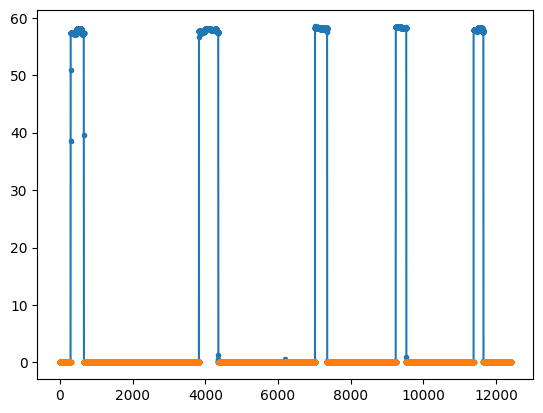

In [5]:
df0.Conductivity.plot(marker=".")
df0.Conductivity[df0.Conductivity<0].plot(marker=".", mfc="none", lw=0)

In [6]:
metadata

{'Now': '12/09/2023 09:16:56',
 'Battery Level': '1.4V',
 '\x00MiniCTD': 'S/N 58934',
 'Site info': '2023_AMARRADEROBOYANORTE_12SEP',
 'Calibrated': '22/02/2017',
 'Latitude': '21.361392',
 'Mode': 'M1',
 'Tare': '10.1028',
 'Pressure units': 'dBar'}

In [7]:
df1 = separate_throws(df0, metadata, threshold=0)
df1

,Pressure,Temperature,Conductivity,Lances,time
0,-0.000,29.483,-0.017,-1,2023-12-09 09:16:56
1,-0.001,29.489,-0.016,-1,2023-12-09 09:16:57
2,-0.002,29.499,-0.016,-1,2023-12-09 09:16:58
3,-0.002,29.504,-0.017,-1,2023-12-09 09:16:59
4,0.001,29.512,-0.016,-1,2023-12-09 09:17:00
...,...,...,...,...,...
12398,-0.018,30.589,-0.017,-1,2023-12-09 12:43:34
12399,-0.021,30.593,-0.017,-1,2023-12-09 12:43:35
12400,-0.019,30.592,-0.017,-1,2023-12-09 12:43:36
12401,-0.020,30.592,-0.017,-1,2023-12-09 12:43:37


<Axes: >

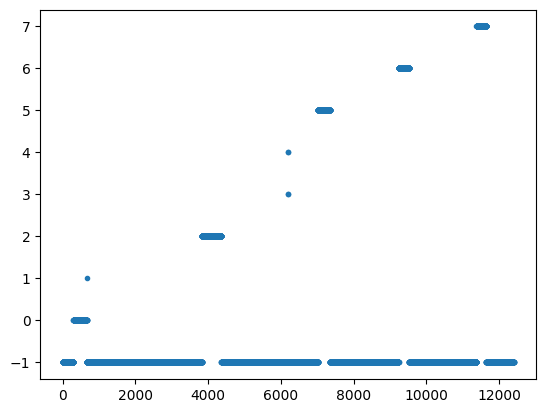

In [8]:
df1.Lances.plot(lw=0, marker=".")

In [9]:
df = calculate_ctd(df1)
df

/Users/hector/anaconda3/envs/era_py39/lib/python3.9/site-packages/seawater/library.py:363: RuntimeWarning: invalid value encountered in sqrt
  Rtx = (rt) ** 0.5


,Pressure,Temperature,Conductivity,Lances,time,Cond_Ratio,Salinity,Density
0,-0.000,29.483,-0.017,-1,2023-12-09 09:16:56,-0.000396,NaN,NaN
1,-0.001,29.489,-0.016,-1,2023-12-09 09:16:57,-0.000373,NaN,NaN
2,-0.002,29.499,-0.016,-1,2023-12-09 09:16:58,-0.000373,NaN,NaN
3,-0.002,29.504,-0.017,-1,2023-12-09 09:16:59,-0.000396,NaN,NaN
4,0.001,29.512,-0.016,-1,2023-12-09 09:17:00,-0.000373,NaN,NaN
...,...,...,...,...,...,...,...,...
12398,-0.018,30.589,-0.017,-1,2023-12-09 12:43:34,-0.000396,NaN,NaN
12399,-0.021,30.593,-0.017,-1,2023-12-09 12:43:35,-0.000396,NaN,NaN
12400,-0.019,30.592,-0.017,-1,2023-12-09 12:43:36,-0.000396,NaN,NaN
12401,-0.020,30.592,-0.017,-1,2023-12-09 12:43:37,-0.000396,NaN,NaN


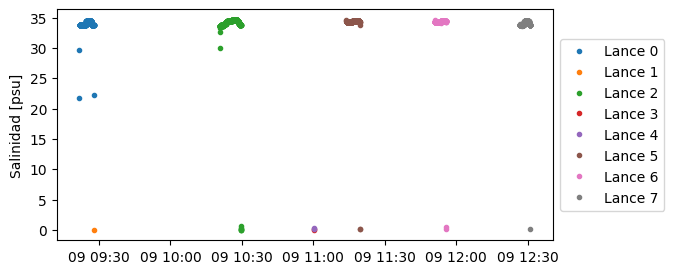

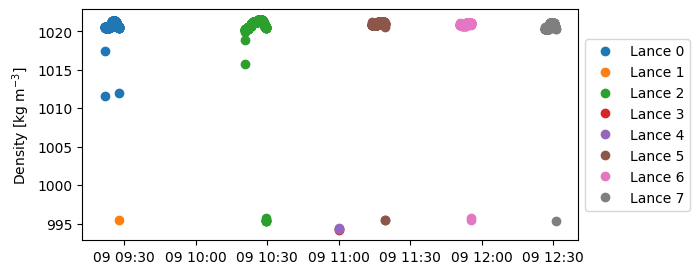

In [10]:
fig0, fig1 = plot_ctd(df)

In [11]:
metadata

{'Now': '12/09/2023 09:16:56',
 'Battery Level': '1.4V',
 '\x00MiniCTD': 'S/N 58934',
 'Site info': '2023_AMARRADEROBOYANORTE_12SEP',
 'Calibrated': '22/02/2017',
 'Latitude': '21.361392',
 'Mode': 'M1',
 'Tare': '10.1028',
 'Pressure units': 'dBar'}

In [12]:
output_throws(df,metadata)

/Users/hector/anaconda3/envs/era_py39/lib/python3.9/site-packages/seawater/library.py:363: RuntimeWarning: invalid value encountered in sqrt
  Rtx = (rt) ** 0.5


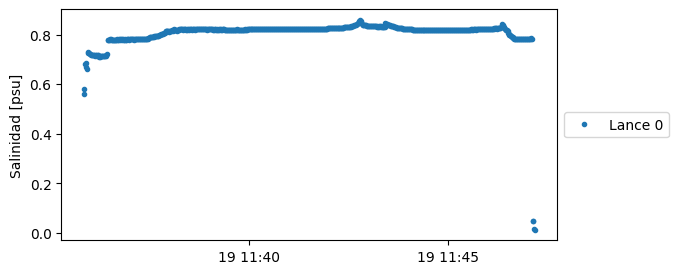

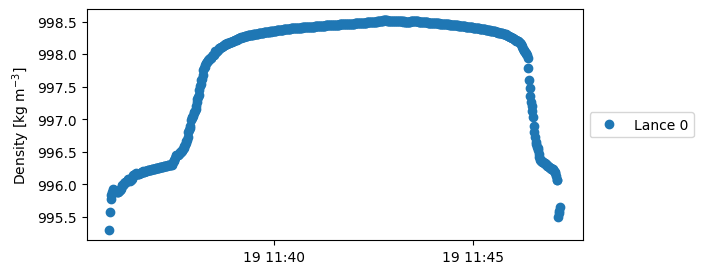

In [283]:
# df, fig0, fig1 = analyze_ctd("Datos/V000015.txt", plot=True)
df, fig0, fig1 = analyze_ctd("Datos/V000019.TXT", plot=True)

In [295]:
df0 = pd.read_csv("Datos_procesados/2023_AMARRADEROBOYANORTE_12SEP_12-09-2023T09:16:56_Lance0.txt", 
                  skiprows=9,
                  sep="\t",
                 )
df0

,time,Pressure,Temperature,Conductivity,Salinity,Density
0,2023-12-09 09:21:50,-0.001,30.640,38.574,21.759734,1011.624406
1,2023-12-09 09:21:51,0.367,30.721,50.905,29.579686,1017.426582
2,2023-12-09 09:21:52,0.393,30.778,57.314,33.752121,1020.525844
3,2023-12-09 09:21:53,0.433,30.796,57.320,33.743684,1020.513477
4,2023-12-09 09:21:54,0.408,30.784,57.324,33.754612,1020.525697
...,...,...,...,...,...,...
359,2023-12-09 09:27:49,0.645,30.806,57.298,33.722160,1020.494818
360,2023-12-09 09:27:50,0.395,30.827,57.329,33.728311,1020.491087
361,2023-12-09 09:27:51,0.400,30.842,57.331,33.719312,1020.479183
362,2023-12-09 09:27:52,0.400,30.848,57.335,33.717834,1020.476000


In [285]:
df0 = pd.read_csv("Datos_procesados/2023_SAMAO_19SEP_19-09-2023T11:14:12_Lance0.txt", 
                  skiprows=9,
                  sep="\t",
                 )
df0

,time,Pressure,Temperature,Conductivity,Salinity,Density
0,2023-09-19 11:35:52,0.004,32.496,1.353,0.580930,995.302508
1,2023-09-19 11:35:53,0.173,31.590,1.286,0.560683,995.578129
2,2023-09-19 11:35:54,0.293,31.226,1.537,0.679818,995.782209
3,2023-09-19 11:35:55,0.413,31.087,1.543,0.684433,995.829654
4,2023-09-19 11:35:56,0.532,30.982,1.505,0.668225,995.850797
...,...,...,...,...,...,...
675,2023-09-19 11:47:07,0.293,30.571,1.740,0.783837,996.063322
676,2023-09-19 11:47:08,-0.009,30.611,0.104,0.049781,995.500192
677,2023-09-19 11:47:09,-0.008,30.418,0.104,0.049895,995.559433
678,2023-09-19 11:47:10,-0.005,30.243,0.017,0.017472,995.588442


In [222]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

<Axes: >

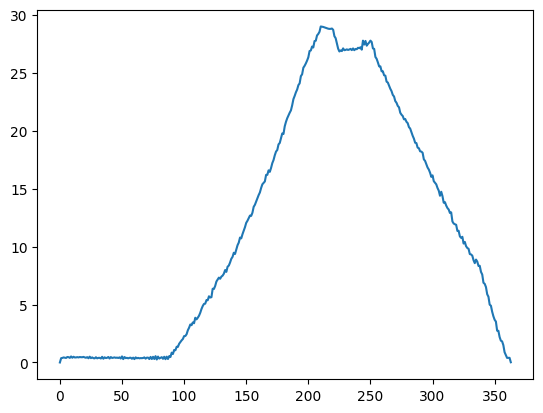

In [121]:
df0.Pressure.plot()

In [287]:
df0_p = df0.sort_values(by=["time","Pressure"])

<Axes: >

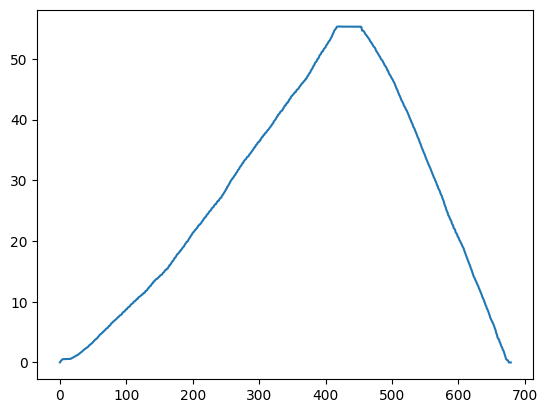

In [288]:
df0_p.Pressure.plot()

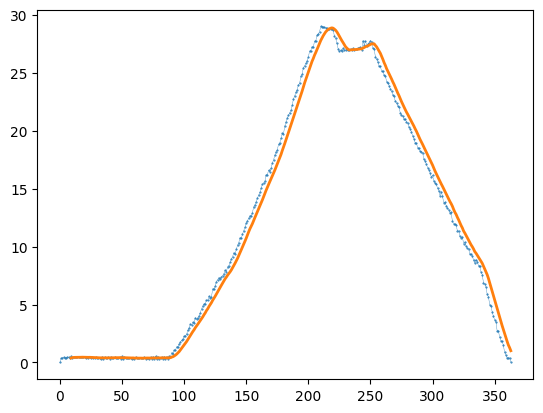

In [216]:
# Define the window size for the running mean
window_size = 10
# Apply the running mean using the rolling method
df0['Pressure_reg'] = df0['Pressure'].rolling(window=window_size).mean()

fig,ax = plt.subplots()
cf = df0.Pressure.plot(ax=ax, marker=".", lw=0.25, ms=1)
cf = df0.Pressure_reg.plot(ax=ax, lw=2, ms=1)

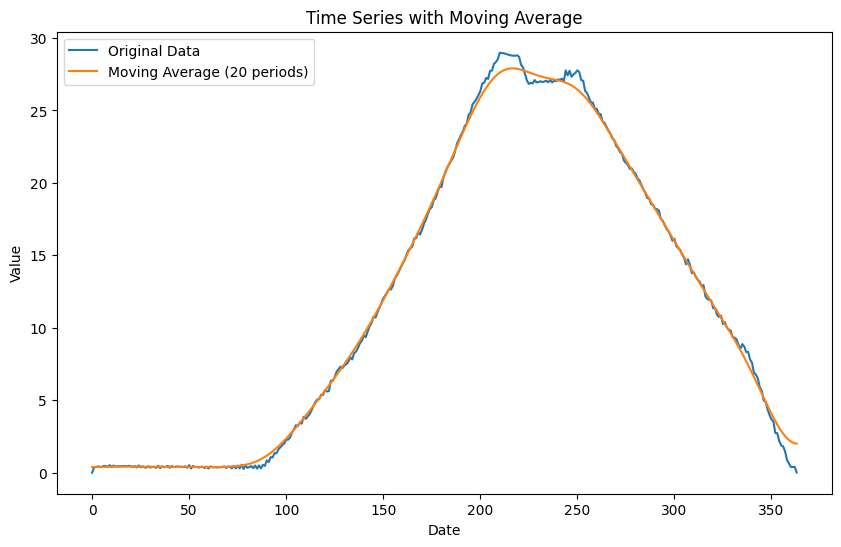

In [296]:
# Assuming df is your DataFrame with a datetime index and a 'value' column
window_size = 20
# df0['MA'] = df0['Pressure'].rolling(window=window_size).mean()

from scipy.ndimage import gaussian_filter1d
sigma = 10.0
df0['MA'] = gaussian_filter1d(df0['Pressure'], sigma=sigma)

plt.figure(figsize=(10, 6))
plt.plot(df0['Pressure'], label='Original Data')
plt.plot(df0['MA'], label=f'Moving Average ({window_size} periods)')
plt.title('Time Series with Moving Average')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [314]:
from scipy.ndimage import gaussian_filter1d
df0['MA'] = gaussian_filter1d(df0['Pressure'], sigma=sigma)

df0['direction'] = pd.cut(df0['MA'].diff(), bins=[-float('inf'), 0, float('inf')], labels=[-1, 1])
df0 = df0.fillna(method='ffill').fillna(method='bfill')

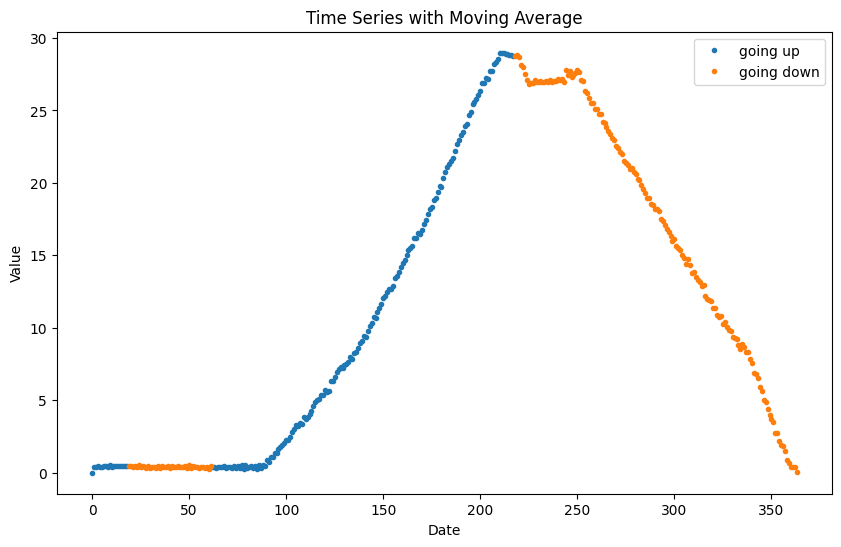

In [315]:
plt.figure(figsize=(10, 6))
# plt.plot(df0['Pressure'], label='Original Data')
plt.plot(df0[df0['direction']== 1]['Pressure'], label='going up', marker=".", lw=0)
plt.plot(df0[df0['direction']==-1]['Pressure'], label='going down', marker=".", lw=0)
plt.title('Time Series with Moving Average')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [327]:
# from sklearn.neighbors import KNeighborsClassifier
# neigh = KNeighborsClassifier(n_neighbors=2)

X = df0.MA.diff().fillna(method='ffill').fillna(method='bfill').values.reshape(-1, 1)
# X = np.arange(len(df0)).reshape(-1, 1)
y = df0.direction
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=2)

In [328]:
df0['predict'] = neigh.predict(X)

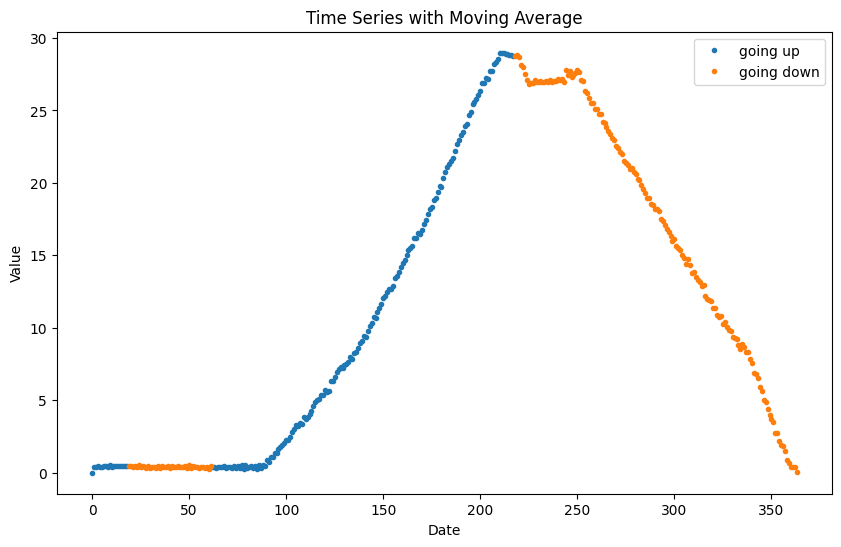

In [329]:
plt.figure(figsize=(10, 6))
# plt.plot(df0['Pressure'], label='Original Data')
plt.plot(df0[df0['predict']== 1]['Pressure'], label='going up', marker=".", lw=0)
plt.plot(df0[df0['predict']==-1]['Pressure'], label='going down', marker=".", lw=0)
plt.title('Time Series with Moving Average')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

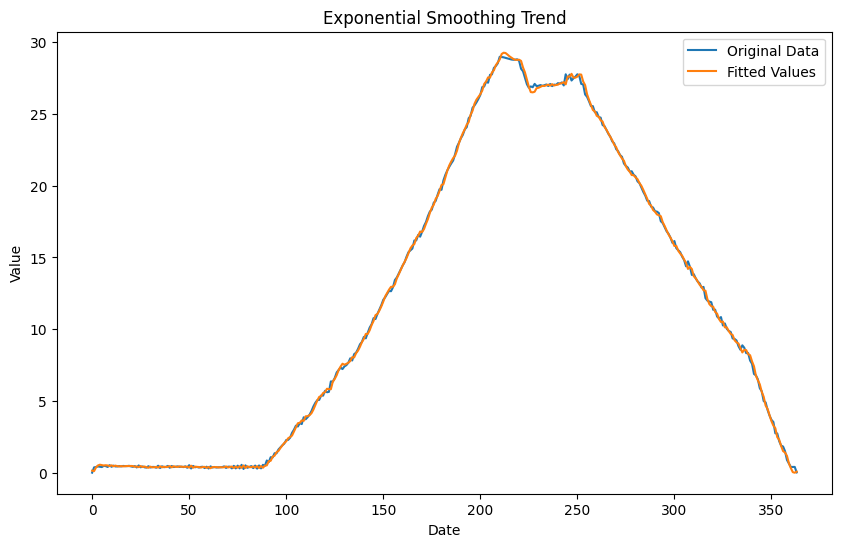

In [280]:
# Assuming df is your DataFrame with a datetime index and a 'value' column
model = ExponentialSmoothing(df0['Pressure'], trend='add', seasonal='add', seasonal_periods=3)
result = model.fit()

plt.figure(figsize=(10, 6))
plt.plot(df0['Pressure'], label='Original Data')
plt.plot(result.fittedvalues, label='Fitted Values')
plt.title('Exponential Smoothing Trend')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [256]:
# from sklearn.neighbors import KNeighborsClassifier
# neigh = KNeighborsClassifier(n_neighbors=2)

X = np.arange(len(df0)).reshape(-1, 1)
y = df0.Pressure
# neigh.fit(X, y)

In [254]:
# df0['kn'] = neigh.predict(X)

In [257]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
# X, y = make_classification(n_samples=1000, n_features=4,
#                            n_informative=2, n_redundant=0,
#                            random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
print(clf.predict([[0, 0, 0, 0]]))

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [95]:
df0.time.apply(lambda x: np.datetime64(x))

0     2023-12-09 09:21:50
1     2023-12-09 09:21:51
2     2023-12-09 09:21:52
3     2023-12-09 09:21:53
4     2023-12-09 09:21:54
              ...        
359   2023-12-09 09:27:49
360   2023-12-09 09:27:50
361   2023-12-09 09:27:51
362   2023-12-09 09:27:52
363   2023-12-09 09:27:53
Name: time, Length: 364, dtype: datetime64[ns]

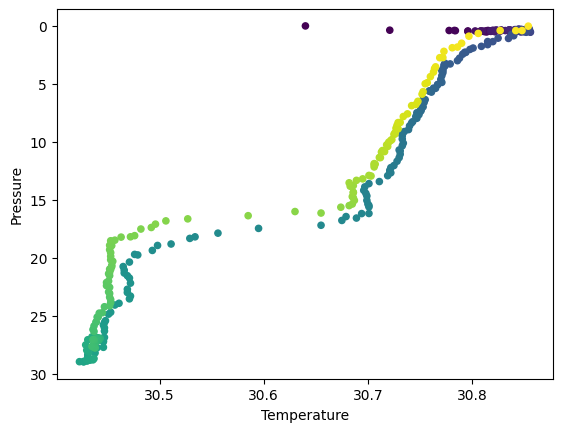

In [96]:
fig,ax = plt.subplots()
cf = df0.plot.scatter("Temperature", "Pressure", ax=ax, color=df0.time.apply(lambda x: np.datetime64(x)))
ax.invert_yaxis()
# cb = fig.colorbar(cf, ax=ax)

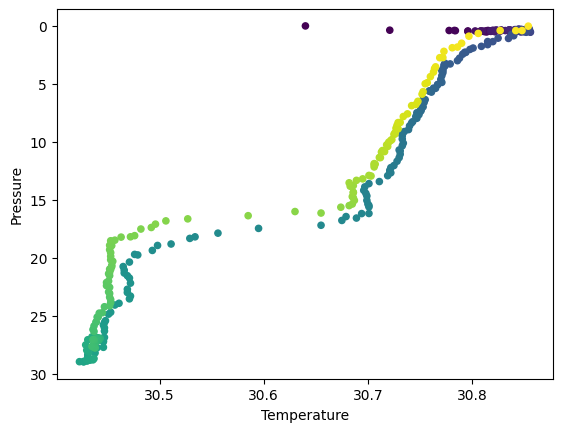

In [79]:
fig,ax = plt.subplots()
cf = df0_p.plot.scatter("Temperature", "Pressure", ax=ax, color=df0_p.time.apply(lambda x: np.datetime64(x)))
ax.invert_yaxis()

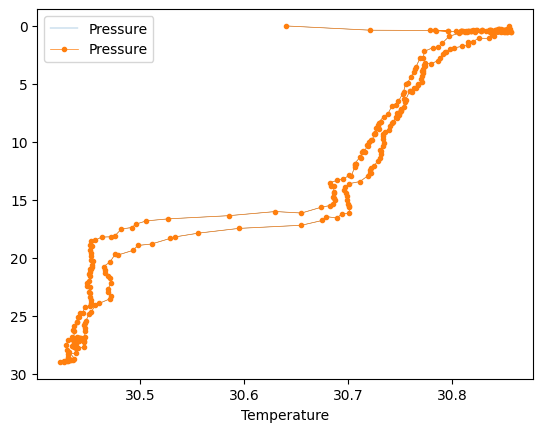

In [82]:
fig,ax = plt.subplots()
df0.plot("Temperature", "Pressure", ax=ax, lw=0.25)
df0_p.plot("Temperature", "Pressure", ax=ax, marker=".", lw=0.5)
ax.invert_yaxis()

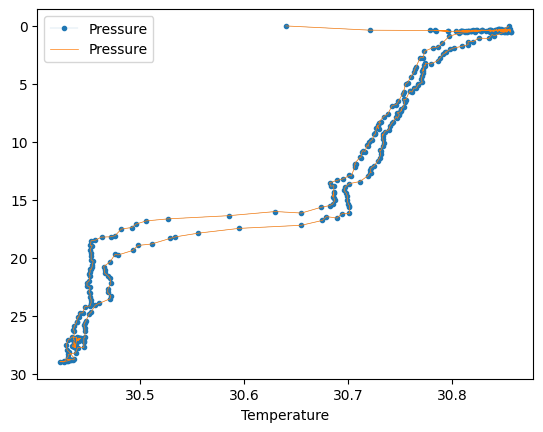

In [84]:
fig,ax = plt.subplots()
df0.plot("Temperature", "Pressure", ax=ax, lw=0.1, marker=".")
df0_p.plot("Temperature", "Pressure", ax=ax, lw=0.5)
ax.invert_yaxis()

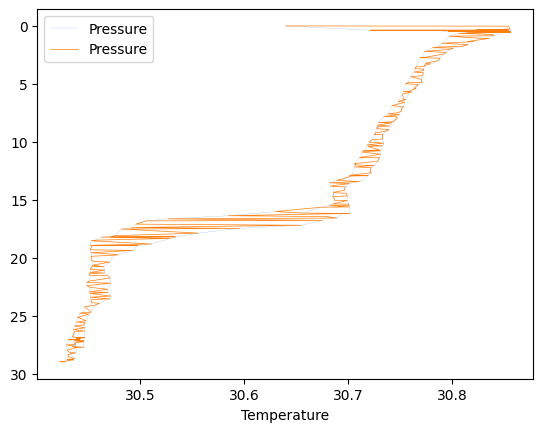

In [110]:
fig,ax = plt.subplots()
df0.plot("Temperature", "Pressure", ax=ax, lw=0.1)
df0_p.plot("Temperature", "Pressure", ax=ax, lw=0.5)
ax.invert_yaxis()

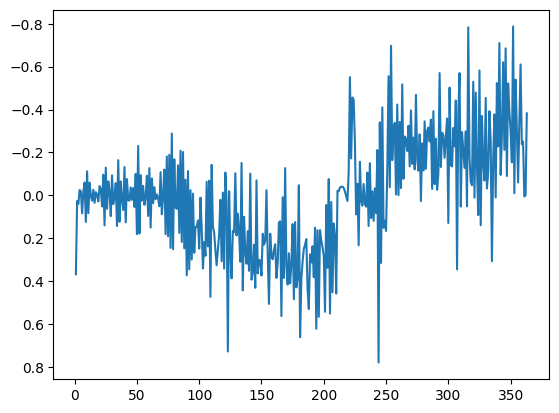

In [89]:
fig,ax = plt.subplots()
cf = df0_p.Pressure.diff().plot(ax=ax)
ax.invert_yaxis()

In [91]:
df0_p = df0.sort_values(by=["Pressure"])

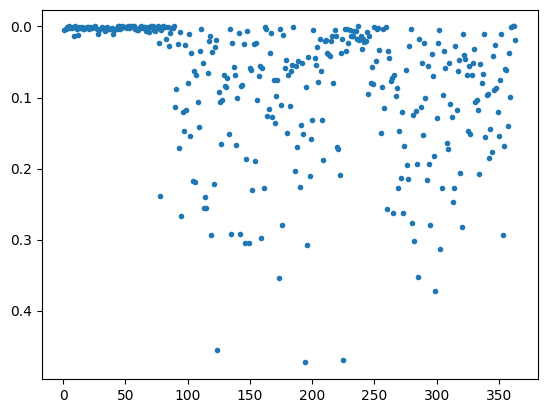

In [93]:
fig,ax = plt.subplots()
cf = df0_p.Pressure.diff().plot(ax=ax, marker=".", lw=0)
ax.invert_yaxis()

In [13]:
# Build layout

layout = [[sg.T("")],
          [sg.Text("Choose file to analyze: "), 
           sg.Input(),
           sg.FileBrowse(key="-IN-")
          ],[sg.Button("Submit")]
         ]

# Building Window
window = sg.Window('My File Browser', layout, size=(600,150))
    
while True:
    event, values = window.read()
    if event == sg.WIN_CLOSED or event=="Exit":
        break
    elif event == "Submit":
        print("Analyzing {}".format(values["-IN-"]))

    _ = analyze_ctd(values["-IN-"])

NameError: name 'sg' is not defined

In [16]:
import PySimpleGUIWeb as sg

ModuleNotFoundError: No module named 'PySimpleGUIWeb'

In [16]:
%%bash 
pip3 install PySimpleGUIWeb

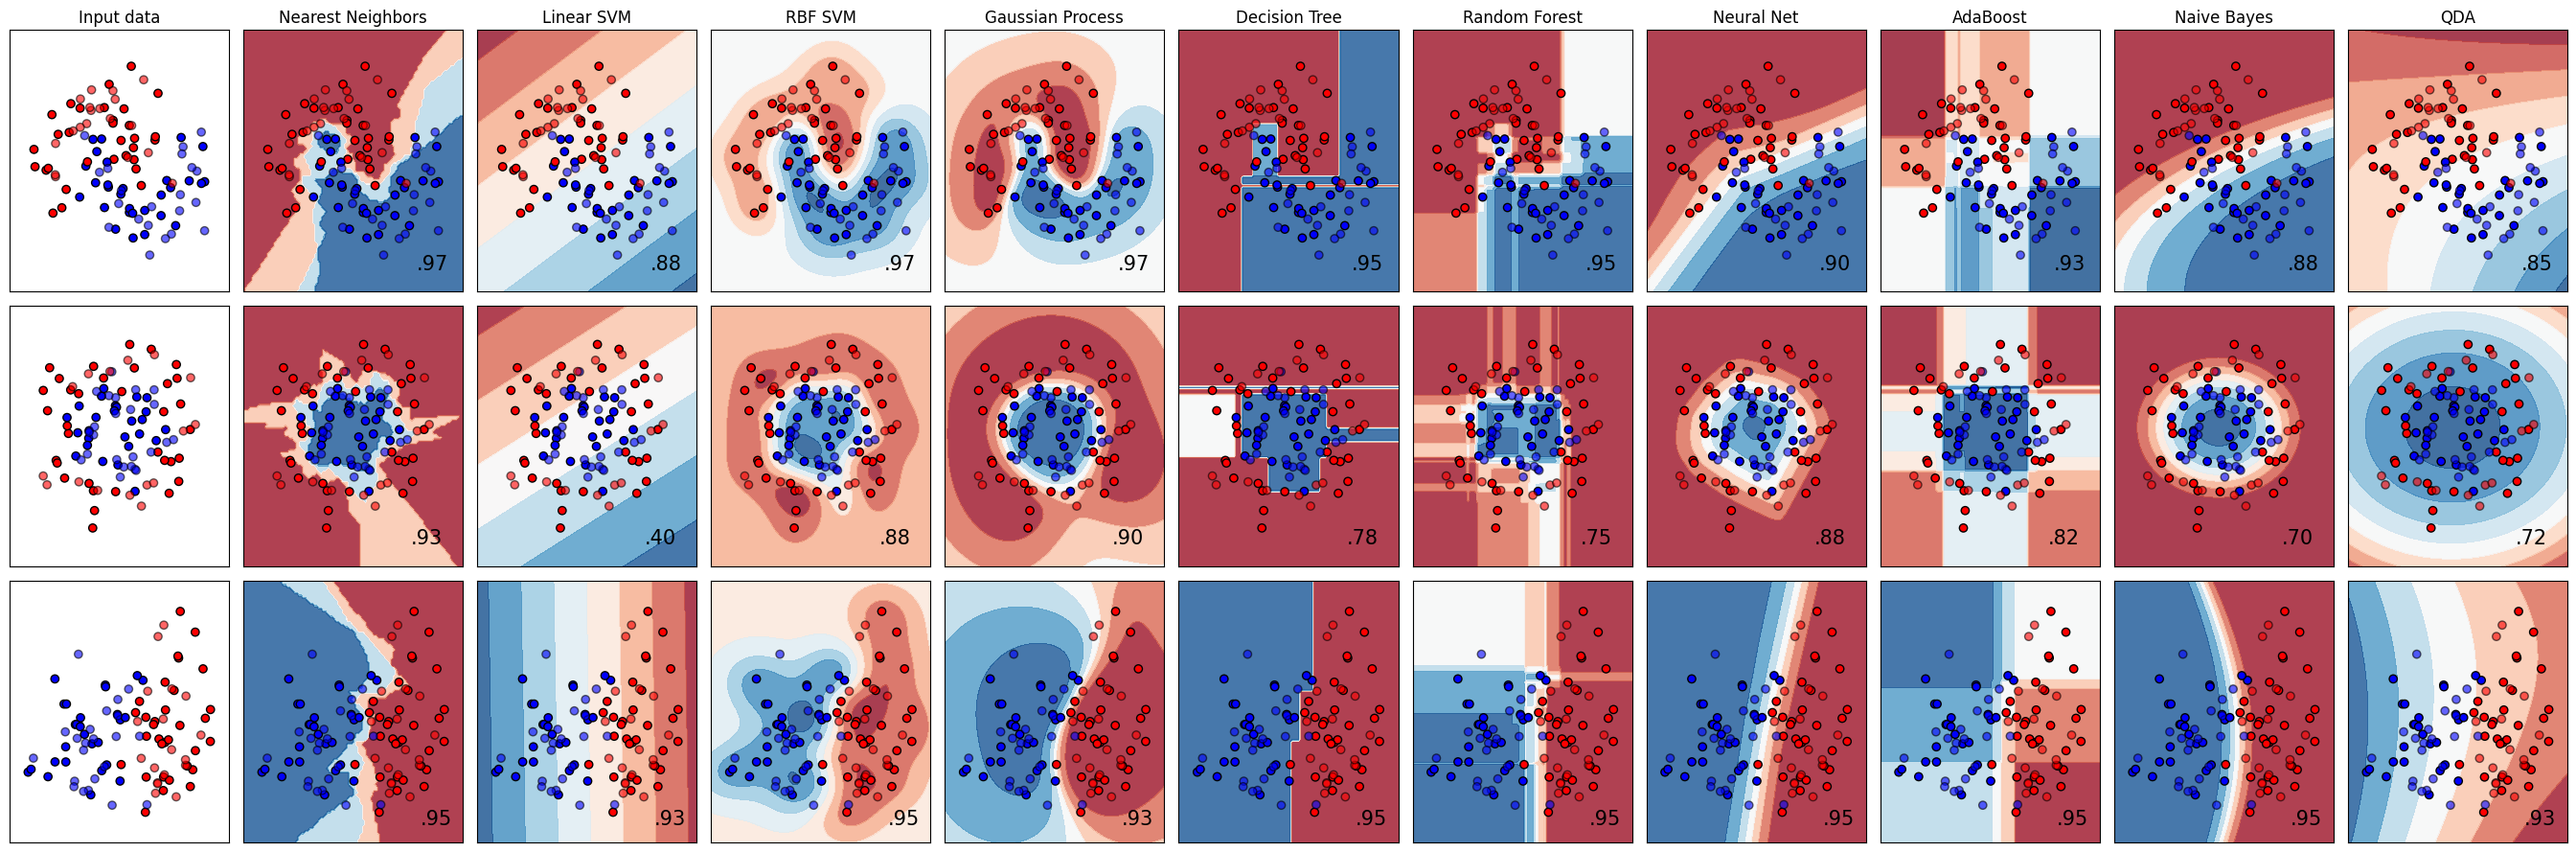

In [234]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()